# DIVE INTO CODE COURSE
## assignment 2 for machine learning a question of going down Mt. Fuji
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

### \[Problem 1] Visualization of data

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [113]:
num_point = []
elevation = []

for i in range(len(fuji)):
    num_point.append(fuji[i][0])
    elevation.append(fuji[i][3])

num_point_array = np.array(num_point)
elevation_array = np.array(elevation)

In [5]:
destination = np.dstack((num_point_array, elevation_array)).reshape(300,2)
destination.shape

(300, 2)

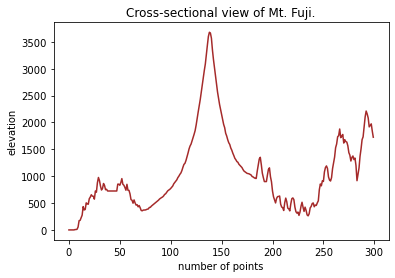

In [6]:
import matplotlib.pyplot as plt

plt.plot(num_point_array, elevation_array, color="brown")
plt.xlabel("number of points")
plt.ylabel("elevation")
plt.title("Cross-sectional view of Mt. Fuji.")
plt.show()

### \[Problem 2] Create a function to calculate the slope of a point

In [7]:
def gradient_calculate(x, y, index):
    """
    Function:
        Calculate the gradient from x (input) and y (input), then plot the graph to show its change

    Argument:
    x (tuple):
        Value of the points
    y (tuple):
        Value of the elevation
    index (int):
        The current location
    
    Output:
    gradient (array):
        Change in y divide for change in x (dY/dX)
    """
    
    x_gradient = x[index] - x[index-1]
    y_gradient = y[index] - y[index-1]
    gradient = y_gradient/x_gradient

    return gradient, x[index], y[index]

In [123]:
gradient, current_x, current_y = gradient_calculate(num_point_array, elevation_array, 10)
gradient

117.15

### \[Problem 3] Create a function to calculate the destination

In [185]:
def destination_calculate(x, y, gradient, learning_rate):
    """
    Function:
        Calculate the gradient from x (input) and y (input), then plot the graph to show its change

    Argument:
    x (array):
        Number of points

    y (array):
        Elevation

    gradient (array):
        Change of y / change of x
    
    Output:
    next_destination (array):
        Next destination based on the previous one
    """

    next_x = np.round(x - learning_rate*gradient)
    next_y = np.round(y - learning_rate*gradient)

    return next_x, next_y

### \[Problem 4] Creating a function to go down the mountain

In [186]:
def descending_mountain(point, elevation, initial_index, learning_rate):

    list_point_iterate = [] 
    list_elevation_iterate = [] 
    list_slope_iterate = []

    # Get the 136th value
    for initial_index in range(initial_index, len(fuji) - 1):
        gradient, current_point, current_elevation = gradient_calculate(point, elevation, initial_index+1)
        next_point, next_elevation = destination_calculate(current_point, current_elevation, gradient, learning_rate)
        list_point_iterate.append(next_point)
        list_elevation_iterate.append(next_elevation)
        list_slope_iterate.append(gradient)

    return list_point_iterate, list_elevation_iterate, list_slope_iterate

In [187]:
# 136th value
next_point, next_elevation, gradient = descending_mountain(num_point_array, elevation_array, 136, 0.2)

In [188]:
next_elevation[10:20]

[2474.0,
 2358.0,
 2260.0,
 2165.0,
 2079.0,
 1983.0,
 1916.0,
 1820.0,
 1758.0,
 1693.0]

### \[Problem 5] Visualization of the descent process

In [189]:
latitude = []

for i in range(len(fuji)):
    latitude.append(fuji[i][1])

latitude_array = np.array(latitude)

In [190]:
# Get the 136th value
initial_index = 136
# 136th value
list_point_iterate, list_elevation_iterate, list_slope_iterate = descending_mountain(num_point_array, elevation_array, initial_index, 0.2)

In [191]:
len(list_elevation_iterate)

163

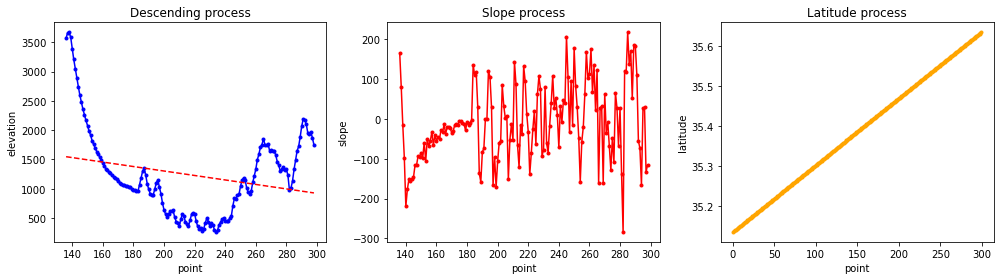

<Figure size 432x720 with 0 Axes>

In [192]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))
plt.figure(figsize=(6,10))

x = num_point_array[initial_index:-1]

# Elevation graph
z = np.polyfit(x, list_elevation_iterate, 1)
p = np.poly1d(z)
axs[0].plot(x, list_elevation_iterate, color="blue", marker=".")
axs[0].plot(x, p(x), "r--")
axs[0].set_title('Descending process')
axs[0].set_xlabel("point")
axs[0].set_ylabel("elevation")


# Slope graph
axs[1].plot(x, list_slope_iterate, color="red", marker=".")
axs[1].set_title('Slope process')
axs[1].set_xlabel("point")
axs[1].set_ylabel("slope")

# Latitude graph
axs[2].plot(num_point_array[1:], latitude_array[1:], color="orange", marker=".")
axs[2].set_title('Latitude process')
axs[2].set_xlabel("point")
axs[2].set_ylabel("latitude")
fig.tight_layout()
plt.show()

After ploting the graph, we can see the direction and curve of the way going down from the hill, thus the elevation which is "y" will be decreased over the time.
<br><br/>
Then, when we look at the second graph, we can see the slope value fluctuate a lot, especially from the 180th point towards the end. It it because the value fluctuate too in the first graph, which lead to the fluctuation in the amount of change of y value.

### \[Problem 6] Change of initial value

In [193]:
# Get the 148th value
new_initial_index = 148

new_point_iterate, new_elevation_iterate, new_slope_iterate = descending_mountain(num_point_array, elevation_array, new_initial_index, 0.2)

Text(0, 0.5, 'slope')

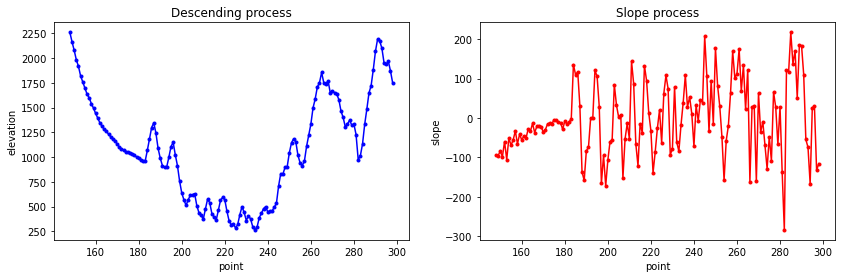

<Figure size 432x720 with 0 Axes>

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))
plt.figure(figsize=(6,10))

x = num_point_array[new_initial_index:-1]

# Elevation graph
axs[0].plot(x, new_elevation_iterate, color="blue", marker=".")
axs[0].set_title('Descending process')
axs[0].set_xlabel("point")
axs[0].set_ylabel("elevation")


# Slope graph
axs[1].plot(x, new_slope_iterate, color="red", marker=".")
axs[1].set_title('Slope process')
axs[1].set_xlabel("point")
axs[1].set_ylabel("slope")

### \[Problem 7] (Advance problem) Change hyperparameters]

In [233]:
# Get the 136th value
new_initial_index = 136
# Default learning rate
old_alpha = 0.2
# Large learning rate
new_alpha = 5

point_hyper, elevation_hyper, slope_hyper = descending_mountain(num_point_array, elevation_array, new_initial_index, old_alpha)
new_point_hyper, new_elevation_hyper, new_slope_hyper = descending_mountain(num_point_array, elevation_array, new_initial_index, new_alpha)

Text(0, 0.5, 'elevation')

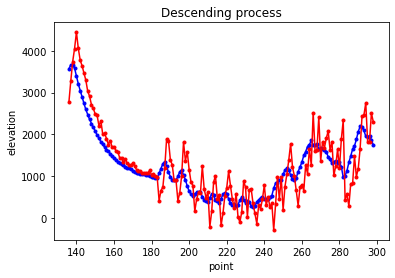

<Figure size 432x720 with 0 Axes>

In [236]:
fig, axs = plt.subplots(1, 1, figsize=(6,4))
plt.figure(figsize=(6,10))

x = num_point_array[new_initial_index:-1]

# Elevation graph
axs.plot(x, elevation_hyper, color="blue", marker=".")
axs.plot(x, new_elevation_hyper, color="red", marker=".")
axs.set_title('Descending process')
axs.set_xlabel("point")
axs.set_ylabel("elevation")


When we change the learning rate from 0.2 (blue line) to 5 (red line), we can see the line shape is quite abnormal. According to the formula $x = x - learning rate * gradient$, if the learning rate is to large, it would cause the next predict location jump so far compare to the actual value.